# Тестовое задание "Открытый код"

## Исходные данные:

Даны два числа N и m 

500 < N <= 1000

10 < m <= 50

## Программа 1 (формирование исходных данных):

По переданным числам N и m заполнить текстовый файл vectors.csv, состоящий из N строк, в каждой из которых m случайных чисел с плавающей точкой, каждое в диапазоне от -1 до +1, разделённых запятыми.

## Программа 2 (основное задание):

На вход подаётся файл vectors.csv, созданный Программой 1. Каждая строка файла рассматривается как m-мерный вектор. Таким образом, получаем N векторов. Требуется вычислить евклидово расстояние между всеми парами различных векторов этого списка, и найти минимальное и максимальное расстояния, а также распределение расстояний.

### Дополнительное требование по использованию памяти:

Недопустимо создавать структуры данных размером более N * m элементов (больше, чем размер входного списка векторов).

### *Результат выводится в виде:*

- номера векторов пары с минимальным расстоянием, и значение этого расстояния;
- номера векторов пары с максимальным расстоянием, и значение этого расстояние;
- изображение гистограммы распределения расстояний с шагом 0,1.

# Выполнение задания:

В задании не указано откуда будут передаваться числа, поэтому принимается, что их будет вводить пользователь по запросу программы. Также необходимо провести проверку переданных данных на соответствие требованиям, потому что пользователь может ввести их неправильно.

## *Запрос данных о значениях N и проверка полученных значений*:

In [1]:
while True:
    user_input = input("Введите число N (или введите 'exit' для выхода): ")

    if user_input.lower() == 'exit':
        print("Программа завершена.")
        break

    try:
        n = int(user_input)

        if 500 < n <= 1000:
            print(f"Введенное число {n} удовлетворяет условиям.")
            break
        elif n <= 500:
            print("Число должно быть больше 500. Повторите ввод.")
        elif n > 1000:
            print("Число должно быть равно или меньше 1000. Повторите ввод.")
    except ValueError:
        print("Введите число цифрами, а не текстом. Повторите ввод.")


Введите число N (или введите 'exit' для выхода): 893
Введенное число 893 удовлетворяет условиям.


## *Запрос данных о значениях m и проверка полученных значений:*

In [2]:
while True:
    user_input = input("Введите число m (или введите 'exit' для выхода): ")

    if user_input.lower() == 'exit':
        print("Программа завершена.")
        break

    try:
        m = int(user_input)

        if 10 < m <= 50:
            print(f"Введенное число {m} удовлетворяет условиям.")
            break
        elif m <= 10:
            print("Число должно быть больше 10. Повторите ввод.")
        elif m > 50:
            print("Число должно быть равно или меньше 50. Повторите ввод.")
    except ValueError:
        print("Введите число цифрами, а не текстом. Повторите ввод.")

Введите число m (или введите 'exit' для выхода): 38
Введенное число 38 удовлетворяет условиям.


## *Формирование файла vectors.csv*:

In [3]:
import random
import csv

def generate_vector(m):
    return [round(random.uniform(-1, 1), 2) for _ in range(m)]

def write_vectors_to_csv(filename, n, m):
    with open(filename, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        
        for _ in range(n):
            vector = generate_vector(m)
            writer.writerow(vector)

if __name__ == "__main__":

    filename = "vectors.csv"

    write_vectors_to_csv(filename, n, m)
    print(f"Файл {filename} успешно создан с {n} строками, каждая длиной {m}.")

Файл vectors.csv успешно создан с 893 строками, каждая длиной 38.


## *Основное задание*:

Минимальное расстояние: Вектор 56 и Вектор 819, Значение: 2.863808652825813
Максимальное расстояние: Вектор 94 и Вектор 737, Значение: 7.375913502746626


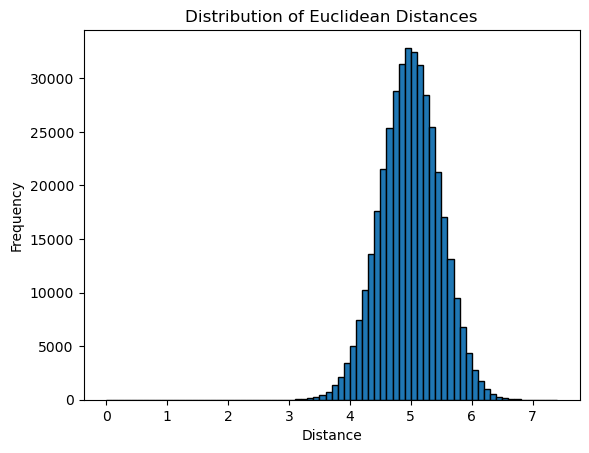

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

def euclidean_distance(v1, v2):
    return np.linalg.norm(np.array(v1) - np.array(v2))

def calculate_distances(vectors):
    min_distance = float('inf')
    max_distance = 0
    distances = []

    for pair in combinations(enumerate(vectors), 2):
        idx1, vec1 = pair[0]
        idx2, vec2 = pair[1]

        distance = euclidean_distance(vec1, vec2)
        distances.append(distance)

        if distance < min_distance:
            min_distance = distance
            min_pair = (idx1, idx2)

        if distance > max_distance:
            max_distance = distance
            max_pair = (idx1, idx2)

    return min_pair, min_distance, max_pair, max_distance, distances

def plot_histogram(distances):
    plt.hist(distances, bins=np.arange(0, max(distances)+0.1, 0.1), edgecolor='black')
    plt.title('Distribution of Euclidean Distances')
    plt.xlabel('Distance')
    plt.ylabel('Frequency')
    plt.show()

if __name__ == "__main__":
    vectors = []
    with open('vectors.csv', 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            vectors.append([float(val) for val in row])

    min_pair, min_distance, max_pair, max_distance, distances = calculate_distances(vectors)

    print(f"Минимальное расстояние: Вектор {min_pair[0]} и Вектор {min_pair[1]}, Значение: {min_distance}")
    print(f"Максимальное расстояние: Вектор {max_pair[0]} и Вектор {max_pair[1]}, Значение: {max_distance}")

    plot_histogram(distances)

Осталось перевести получившийся код из ноутбука в программу на Python.
А ещё будет интересно попробовать сделать это в Rust.